In [99]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("haberman.csv") # about of the cancer patient between 1958 to 1970
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [8]:
df.columns = ["Age", "OP_Year","axil_nodes","Surv_status"]
df.head()

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
# Here, Survival status
    # 1 = The patient survived 5 years or longer
    # 2 = The patient died within 5 year

## Checking out the data 

In [10]:
df.describe()

,Age,OP_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   OP_Year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [12]:
df["Surv_status"].value_counts()

Surv_status
1    224
2     81
Name: count, dtype: int64

## Checking the correlation between the features

In [16]:
corr = df.corr()
corr["Surv_status"].sort_values(ascending=0)


Surv_status    1.000000
axil_nodes     0.286191
Age            0.064351
OP_Year       -0.004076
Name: Surv_status, dtype: float64

## converting all 1 & 2 into yes and no

In [17]:
df["Surv_status"] = df["Surv_status"].map({1:"Yes",2:"No"})
df.head()

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


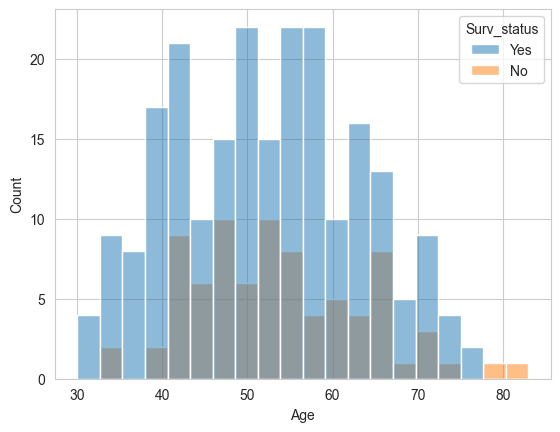

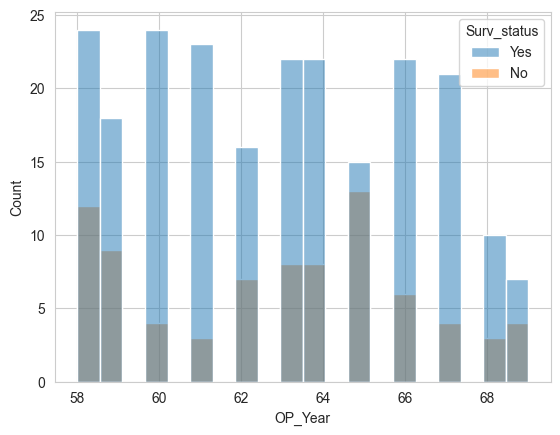

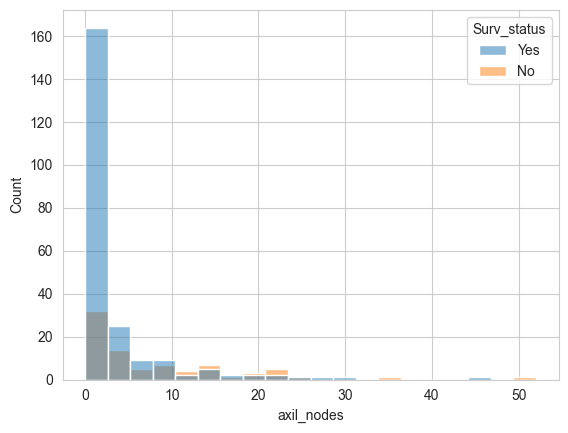

In [81]:
def hist(feature):
    sns.histplot(df, x = feature, bins = 20, hue="Surv_status")
    plt.show()

hist('Age')
hist('OP_Year')
hist('axil_nodes')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


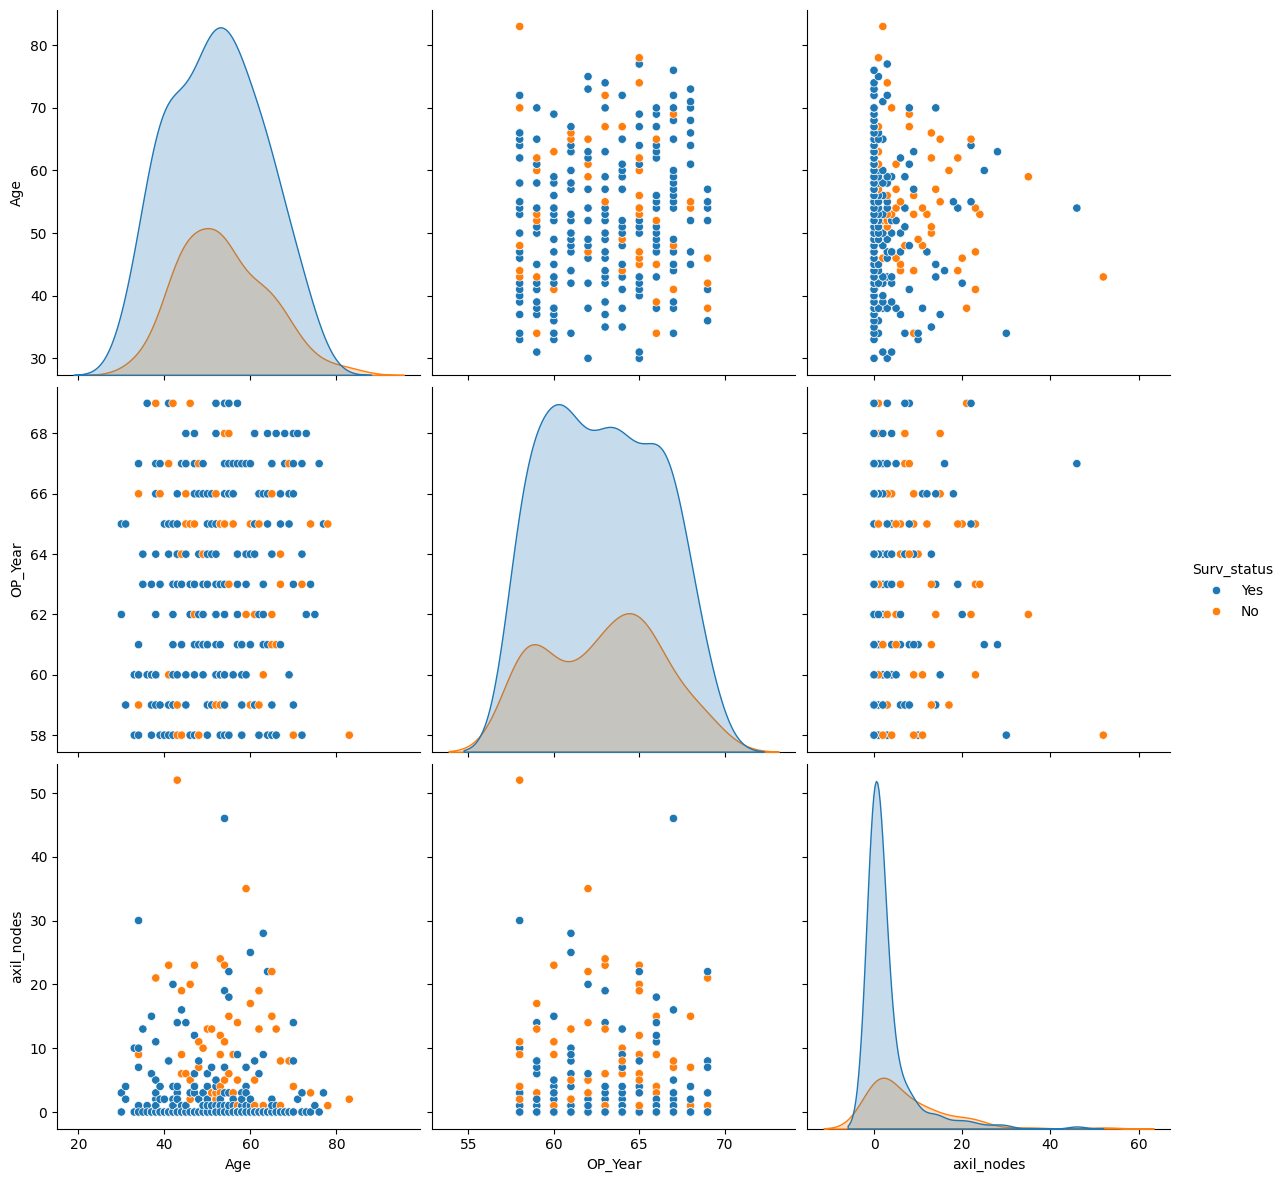

In [36]:
sns.pairplot(df, hue='Surv_status', size=4)
plt.show()

In [ ]:
# In the year of 1960-1964 the success rate are higher than other year's.

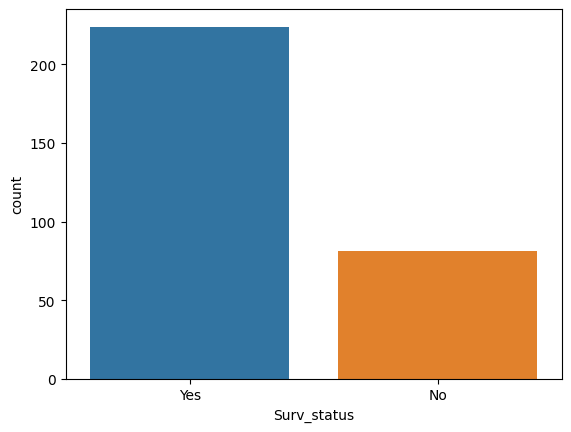

In [23]:
sns.countplot(df, x = 'Surv_status', hue='Surv_status')
plt.show()

By the count plot we can see the survival of more than 5 year is more than survival of less than 5 year .

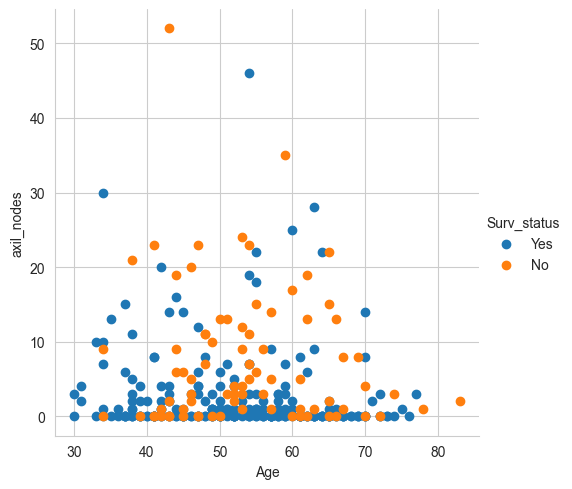

In [86]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Surv_status", height=5)\
.map(plt.scatter, "Age", "axil_nodes")\
.add_legend()

plt.show()

In [20]:
# The survival status along the axile nodes are positive at the age of 30-38.
# We can also see that the lower the axile node is the higher the survival chances .
# It is also noticeble that in the age of 40-50 & 60-67 the level of axil nodes age 0 but the survival status is No

# What is axile node 

In [21]:
# The axillary lymph nodes are in the armpits, near the breasts. This means they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.
# Lymph nodes are small structures inside the body that connect to a network of lymph vessels.

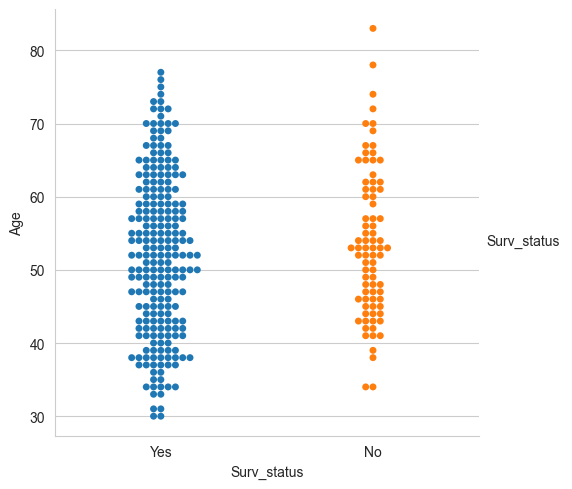

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


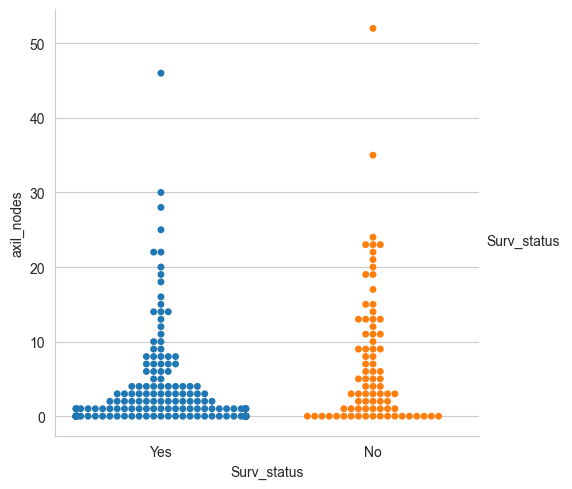

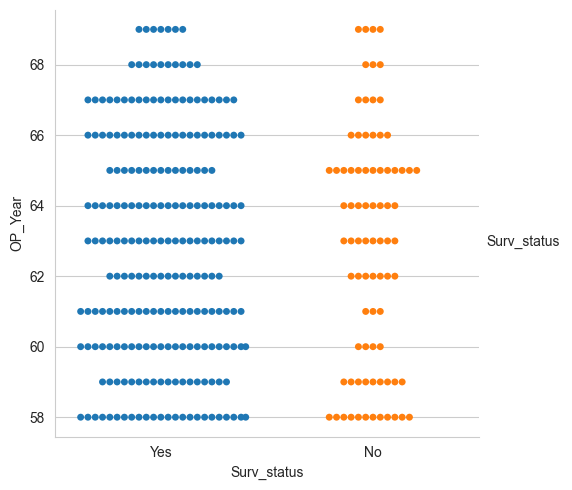

In [88]:
def cat(feature):
    sns.catplot(df , x = "Surv_status" , y = feature ,  kind  = "swarm", hue='Surv_status')
    plt.show()

cat('Age')
cat('axil_nodes')
cat('OP_Year')

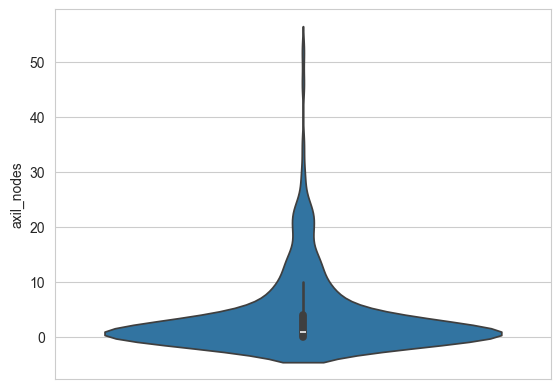

In [92]:
sns.violinplot(df, y="axil_nodes")
plt.show()

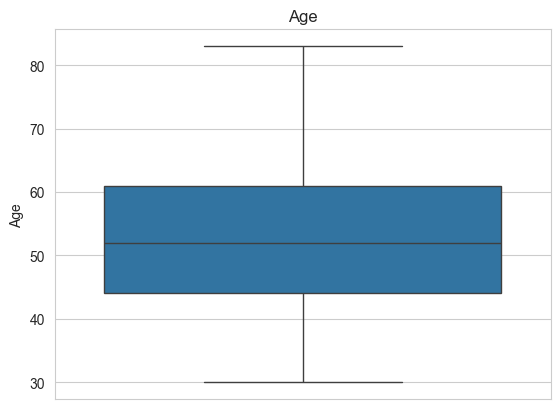

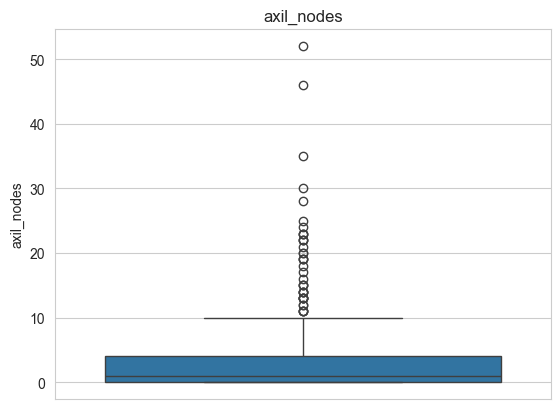

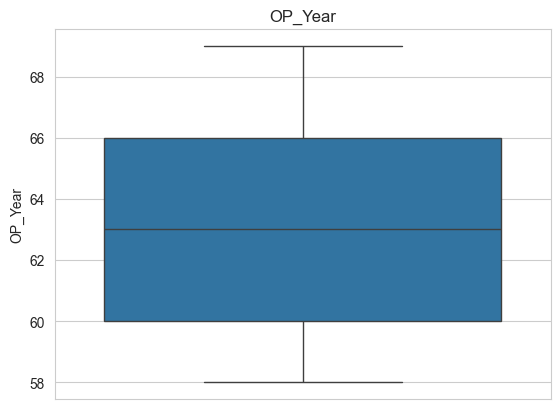

In [94]:
def box(feature):
    sns.boxplot(df, y=feature)
    plt.title(feature)
    plt.show()

box('Age')
box('axil_nodes')
box('OP_Year')

In [95]:
df.head()

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [96]:
X = df.iloc[:, :3]
y = df.iloc[:, 3]
X,y

(     Age  OP_Year  axil_nodes
 0     30       62           3
 1     30       65           0
 2     31       59           2
 3     31       65           4
 4     33       58          10
 ..   ...      ...         ...
 300   75       62           1
 301   76       67           0
 302   77       65           3
 303   78       65           1
 304   83       58           2
 
 [305 rows x 3 columns],
 0      Yes
 1      Yes
 2      Yes
 3      Yes
 4      Yes
       ... 
 300    Yes
 301    Yes
 302    Yes
 303     No
 304     No
 Name: Surv_status, Length: 305, dtype: object)

In [97]:
X.shape, y.shape

((305, 3), (305,))

In [100]:
X_train, X_test, y_train, y_test  = train_test_split(X, y  , test_size = 0.2 , random_state  = 42)

<p>KNN</p>

In [101]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [103]:
y_prediction = knn.predict(X_test)
y_prediction

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes'], dtype=object)

<p>Model Evaluation</p>

In [104]:
import numpy as np
z = np.vstack((y_prediction, y_test))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes
1,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes


In [105]:
accuracy_score(y_prediction, y_test)

0.6721311475409836

<p>Naive bayes</p>

In [106]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [107]:
naive_model.fit(X_train, y_train)

GaussianNB()

In [108]:
y_pred = naive_model.predict(X_test)

In [109]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
1,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes


In [110]:
accuracy_score(y_pred, y_test)

0.7704918032786885

## Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [112]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
y_pred = tree.predict(X_test)

In [115]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes
1,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes


In [116]:
accuracy_score(y_pred, y_test)

0.7377049180327869

## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [118]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
y_pred = forest.predict(X_test)

pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,...,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes
1,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes


In [120]:
accuracy_score(y_pred, y_test)

0.7540983606557377